Firstly, we load all the essential Python modules required for data handling, visualization, and to suppress warnings. These libraries will help us perform efficient data analysis and create insightful visualizations.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

numpy and pandas → For data manipulation and analysis.

matplotlib.pyplot and seaborn → For creating static visualizations.

warnings → To suppress unwanted warning messages for cleaner output

Step 1. Data Ingestion
In this step we load the required datasets in our python enviroment

In [3]:
df1 = pd.read_csv('Datasets/zomato.csv', encoding='latin1')
df2 = pd.read_excel('Datasets/Country-Code.xlsx') 

df = pd.merge(df1, df2, on='Country Code', how='inner') 

We begin by loading the two datasets:
- `zomato.csv` which contains restaurant-level information
- `Country-Code.xlsx` which maps country codes to actual country names

Since the `Country Code` column is common in both datasets, we perform an **inner merge** to combine them into a single DataFrame.

In [4]:
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


Step 2. Preprocessing

Before diving deeper into analysis, it's important to ensure our data is clean. In this step, we check for:

- **Missing Values** (NaN or Null)
- **Duplicate Records**

### 🔍 Functions Used:
- `df.isnull()` – Checks for `null` values (also written as `NaN`)
- `df.isna()` – Alias of `isnull()`, used interchangeably
- `df.duplicated()` – Detects duplicate rows

### ✅ Handling Strategy:
- Use `.sum()` with `isnull()` to count missing values per column.
- Fill missing values using either:
  - `fillna()` – Quick filling with a specific value or statistic (e.g., mode)
  - `SimpleImputer` – From `sklearn`, for advanced strategies like mean, median, mode
- Remove duplicates using `.drop_duplicates()` if any exist.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [7]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

Now we will perform some basic preprocessing in which we handle the column perform some function and drop the unnecssary column

In [9]:
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower()

In [10]:
df['Primary Cuisine'] = df['Cuisines'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

In [11]:
df['Has Table booking'] = df['Has Table booking'].map({'Yes': 1, 'No': 0})

In [12]:
df.drop(['Address', 'Locality Verbose'], axis=1, inplace=True)

In [13]:
df.rename(columns={'Average Cost for two': 'Avg_Cost', 'Has Table booking': 'Table_Booking'}, inplace=True)

In [ ]:
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

In [ ]:
df.drop(columns='Longitude', inplace=True)
df.drop(columns='Latitude', inplace=True)
df.drop(columns='Table_Booking', inplace=True) 
df.drop(columns='Restaurant ID', inplace=True)

Step 3. EDA

<Axes: xlabel='Rating text', ylabel='count'>

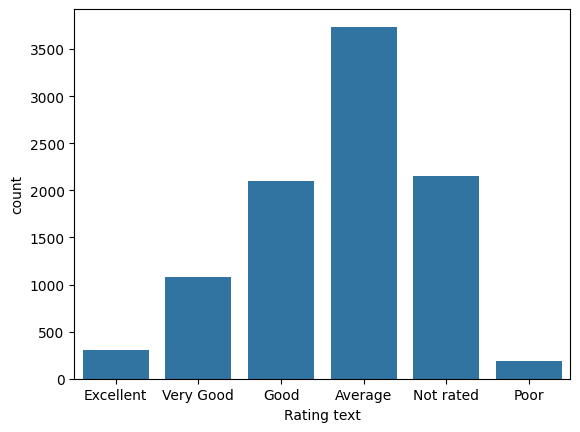

In [44]:
sns.countplot(x='Rating text', data=df)

<Axes: xlabel='Country', ylabel='count'>

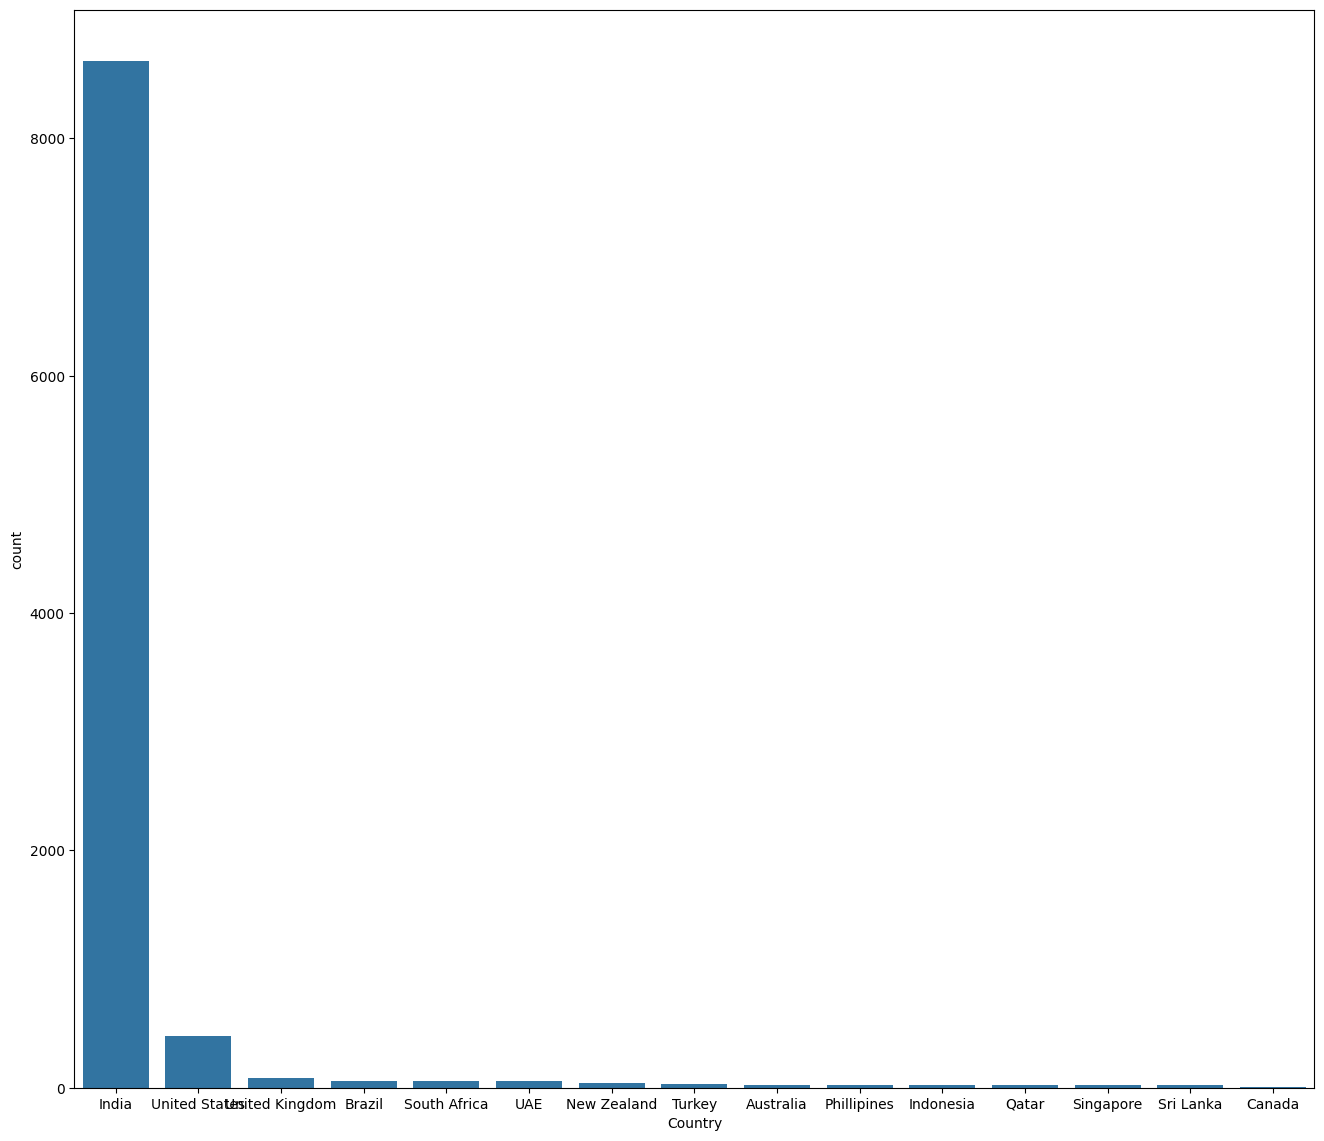

In [47]:
plt.figure(figsize=(16,14))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)

<Axes: xlabel='count', ylabel='Primary Cuisine'>

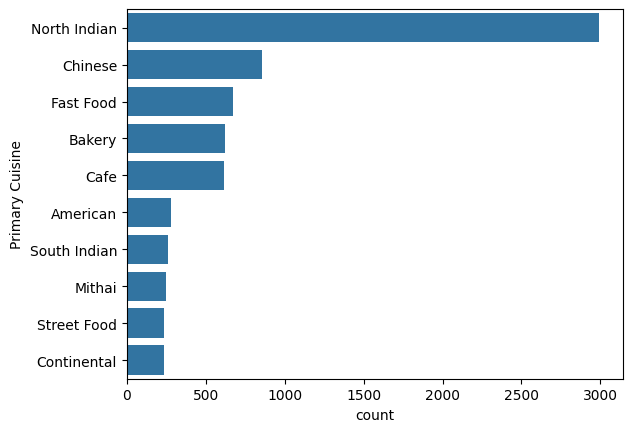

In [46]:
sns.countplot(y='Primary Cuisine', data=df, order=df['Primary Cuisine'].value_counts().head(10).index)


<Axes: xlabel='Aggregate rating', ylabel='Count'>

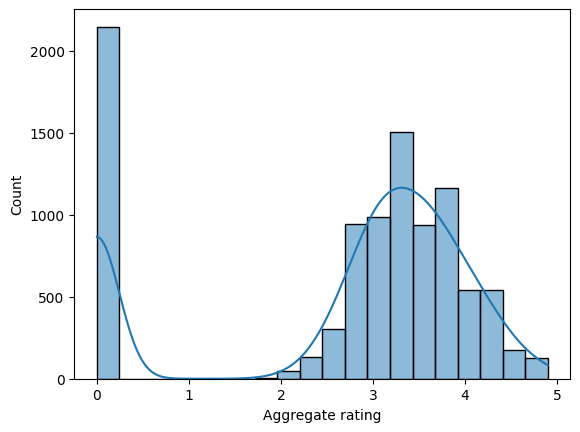

In [48]:
sns.histplot(df['Aggregate rating'], bins=20, kde=True)

<Axes: xlabel='Rating text', ylabel='Votes'>

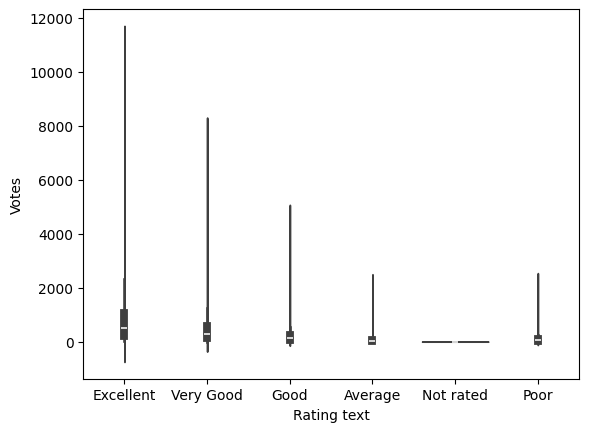

In [49]:
sns.violinplot(x='Rating text', y='Votes', data=df)

<Axes: xlabel='Price range', ylabel='Avg_Cost'>

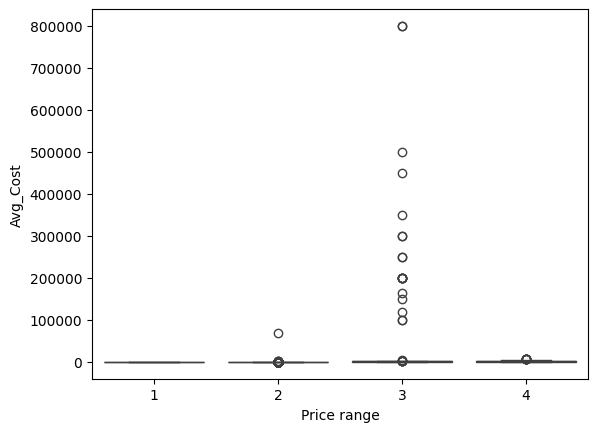

In [50]:
sns.boxplot(x='Price range', y='Avg_Cost', data=df)

<Axes: xlabel='Country', ylabel='Votes'>

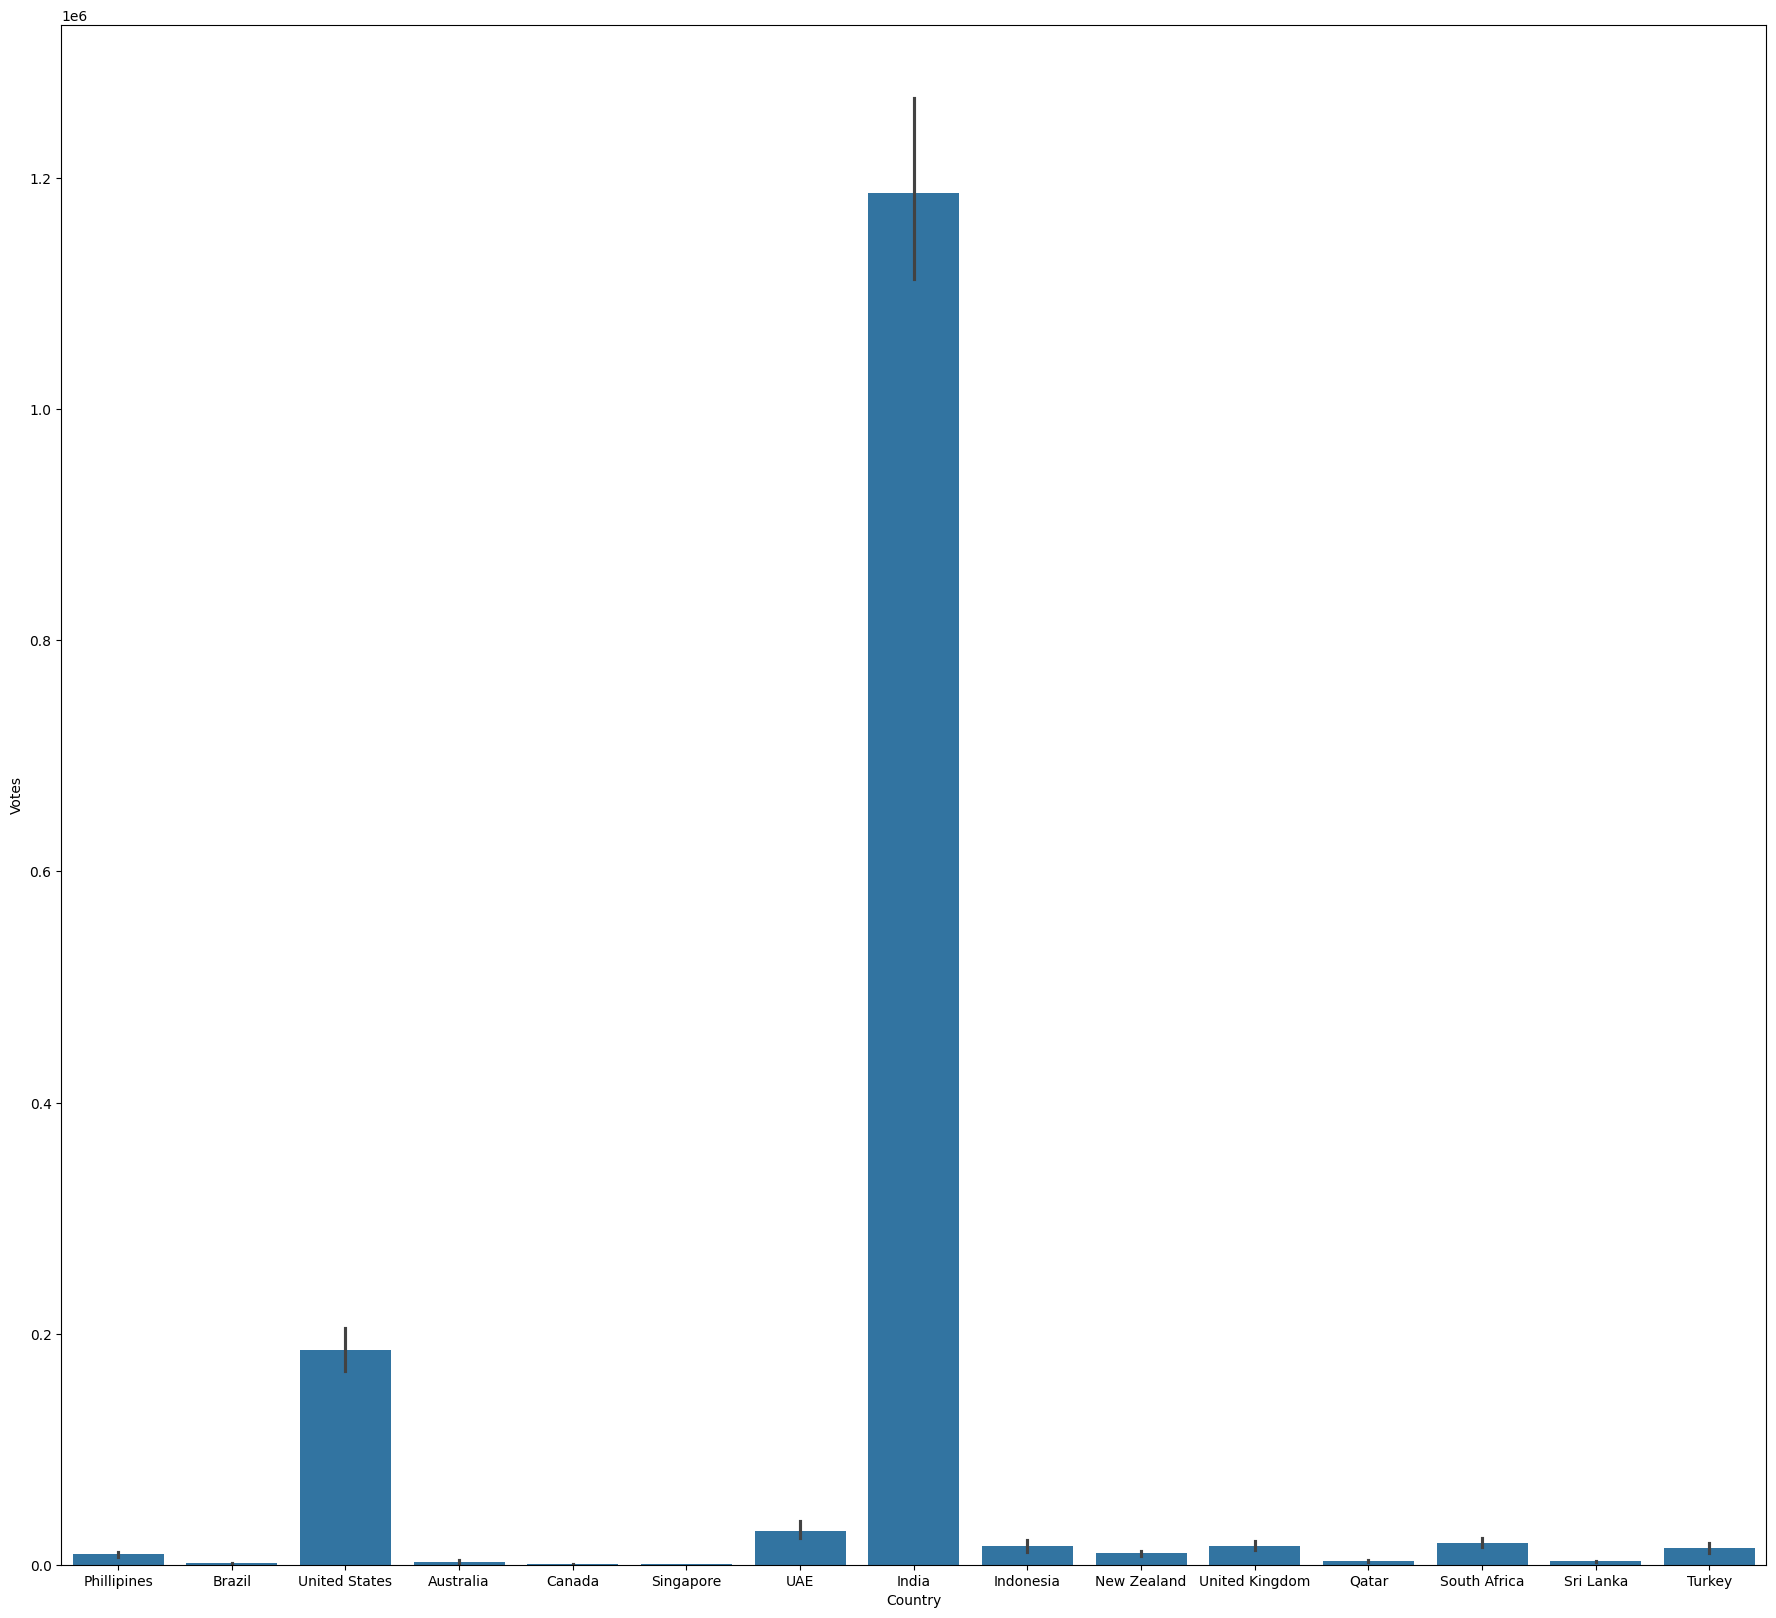

In [55]:
plt.figure(figsize=(22,20))
sns.barplot(x='Country', y='Votes', data=df, estimator='sum')

<Axes: xlabel='Rating text', ylabel='Avg_Cost'>

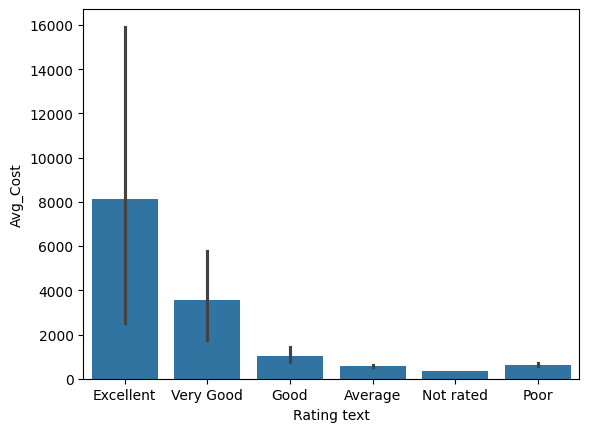

In [52]:
sns.barplot(x='Rating text', y='Avg_Cost', data=df, estimator='mean')

<Axes: xlabel='Price range', ylabel='Votes'>

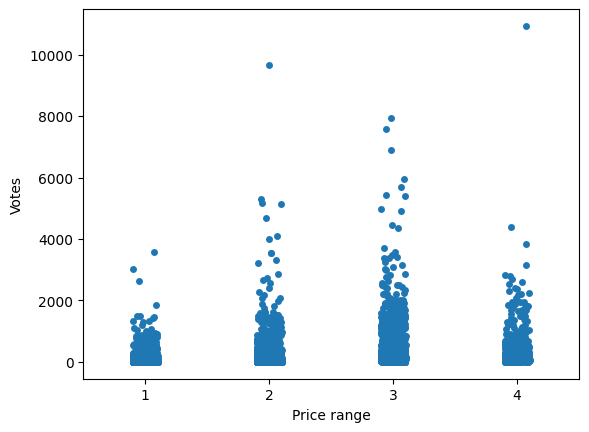

In [56]:
sns.stripplot(x='Price range', y='Votes', data=df, jitter=True)

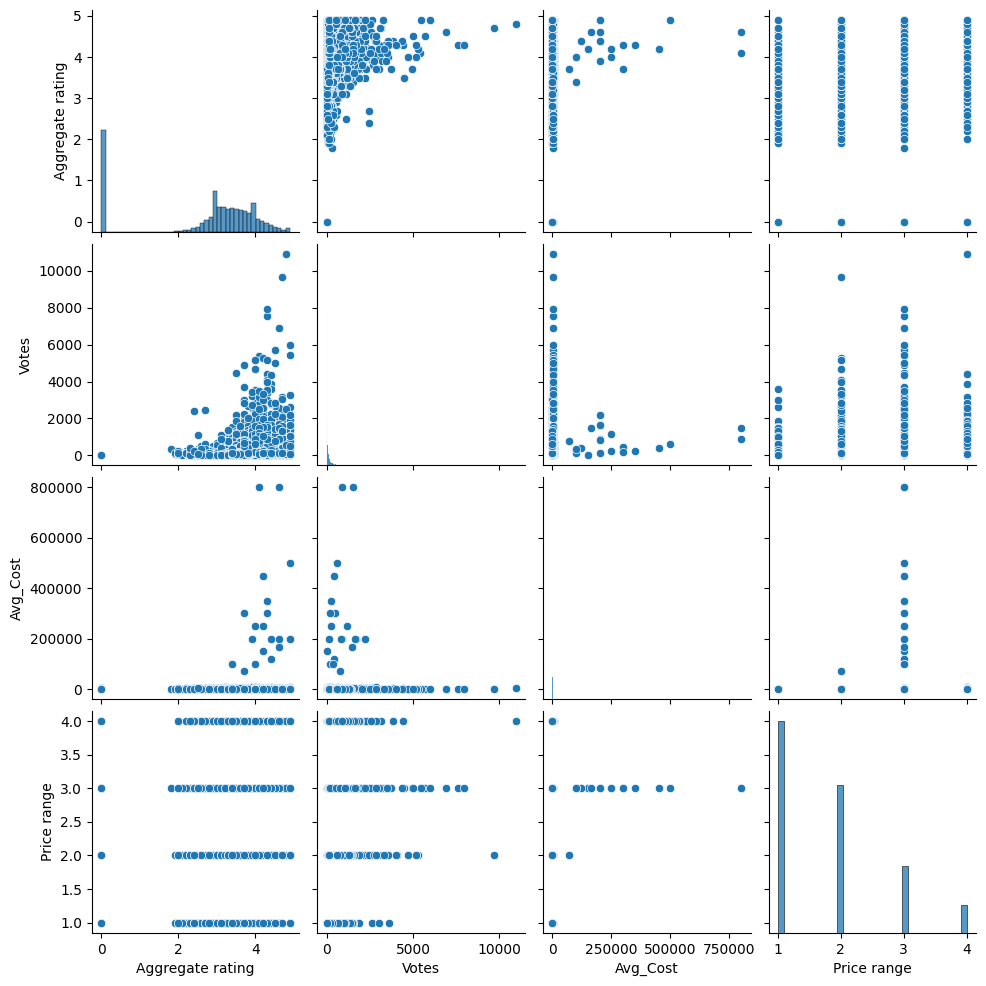

In [26]:
sns.pairplot(df[['Aggregate rating', 'Votes', 'Avg_Cost', 'Price range']])

Text(0.5, 1.0, 'Rating Distribution per Country')

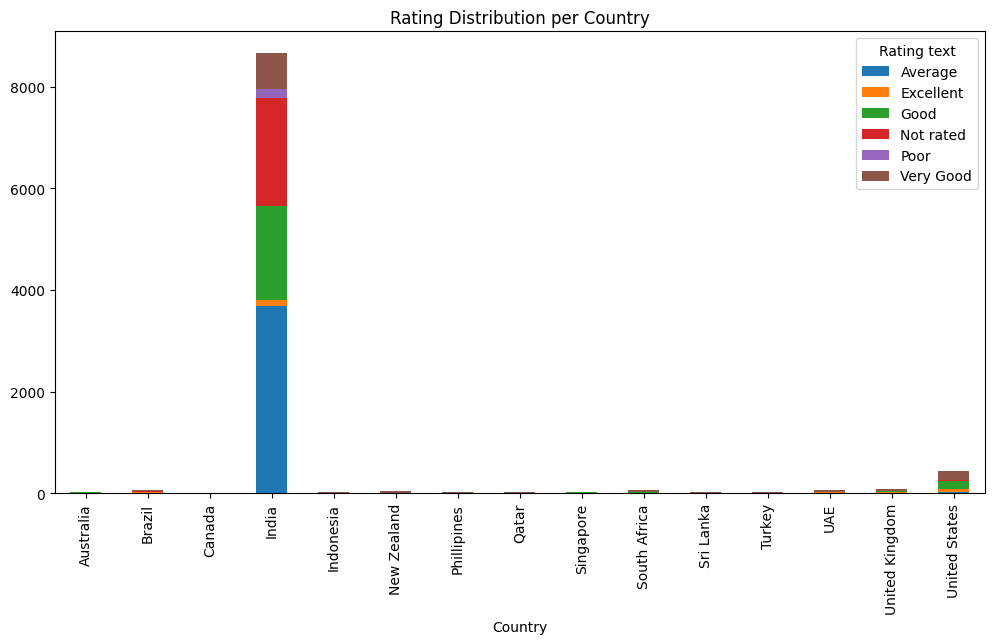

In [25]:
df_pivot = df.pivot_table(index='Country', columns='Rating text', values='Restaurant Name', aggfunc='count')
df_pivot.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Rating Distribution per Country')

<Axes: xlabel='Rating text', ylabel='Has Online delivery'>

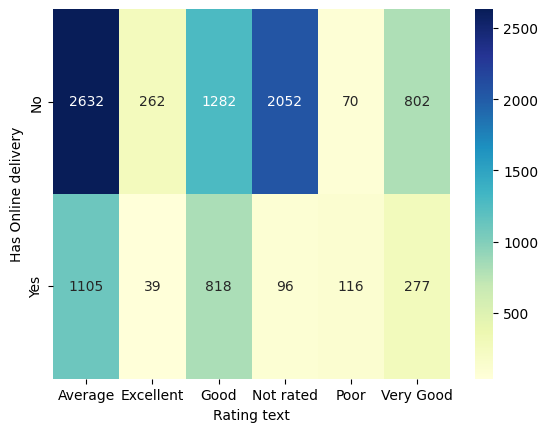

In [27]:
cross = pd.crosstab(df['Has Online delivery'], df['Rating text'])
sns.heatmap(cross, annot=True, fmt='d', cmap='YlGnBu')

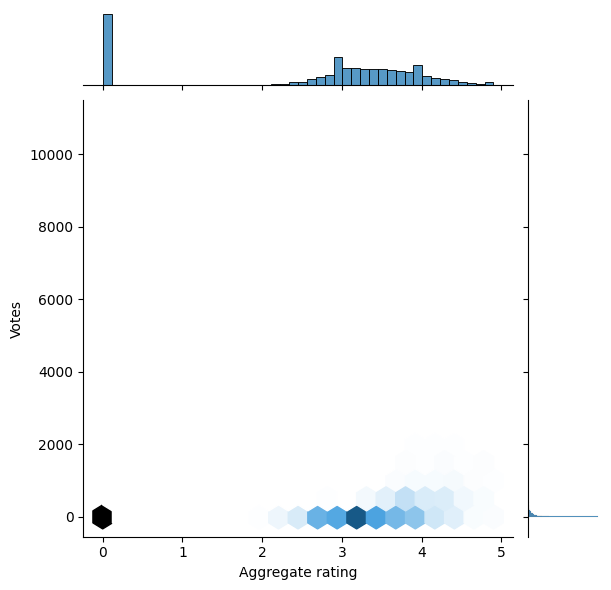

In [28]:
sns.jointplot(x='Aggregate rating', y='Votes', data=df, kind='hex', gridsize=20)

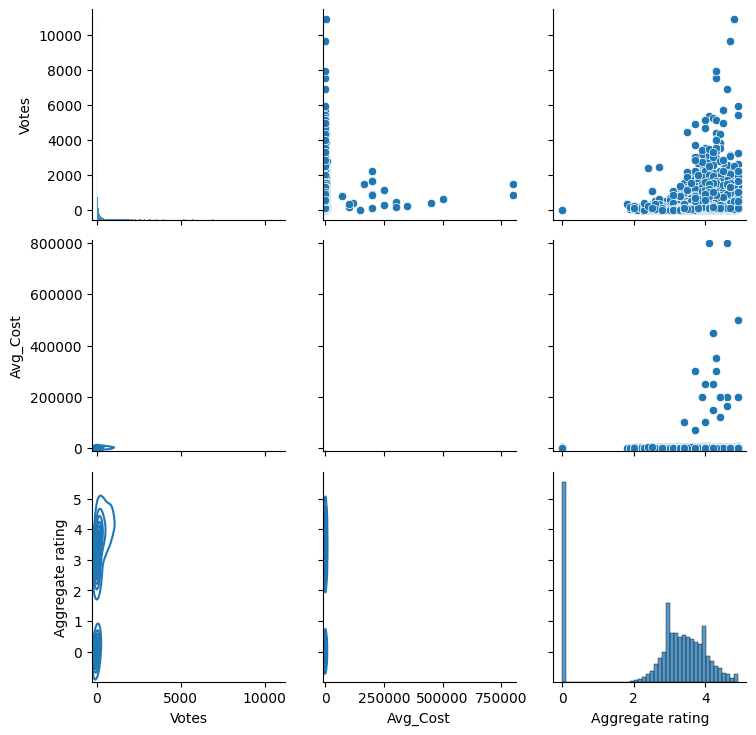

In [29]:
g = sns.PairGrid(df[['Votes', 'Avg_Cost', 'Aggregate rating']], diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)